# 6.1 Проверочная и обучающая выборки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina' # для более четкой отрисовки графиков

In [2]:
ds = pd.read_csv('Energy_and_Water_Data_Disclosure.csv') # https://www1.nyc.gov/html/gbee/html/plan/ll84_scores.shtml
print('Размер загруженного датасета: {}'.format(ds.shape))

Размер загруженного датасета: (11746, 60)


In [3]:
ds.head(5) # посмотрим на первые 5 строчек датасета

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,...,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,...,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0,Washington Heights South ...


In [4]:
ds.columns

Index(['Order', 'Property Id', 'Property Name', 'Parent Property Id',
       'Parent Property Name', 'BBL - 10 digits',
       'NYC Borough, Block and Lot (BBL) self-reported',
       'NYC Building Identification Number (BIN)', 'Address 1 (self-reported)',
       'Address 2', 'Postal Code', 'Street Number', 'Street Name', 'Borough',
       'DOF Gross Floor Area', 'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)',
       '2nd Largest Property Use Type',
       '2nd Largest Property Use - Gross Floor Area (ft²)',
       '3rd Largest Property Use Type',
       '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'Metered Areas  (Water)', 'ENERGY STAR Score',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'Weath

In [5]:
ds = ds.drop(['Order', 'Property Id', 'Parent Property Id'], axis=1) #  выбросим признаки, т.к. это просто счетчики

В датасете много значений  "Not Available", заменим их на Nan:

In [6]:
ds = ds.replace('Not Available', np.nan)

In [7]:
ds.dtypes.value_counts() # кол-во признаков разных типов в датасете - 47 категориальных и 10 численных

object     47
float64     6
int64       4
dtype: int64

Кажется, что кол-во численных признаков должно быть больше, возможно они записаны как строковые переменные - проверим это:

In [8]:
for col in ds.columns: 
    if ds[col].dtype == 'O': # если колонка типа object
        try:
            ds[col] = ds[col].astype(float) # преобразуем в формат float
        except:
            pass

In [9]:
ds.dtypes.value_counts() # теперь кол-во категориальных равно 22, а числовых - 35

float64    31
object     22
int64       4
dtype: int64

<AxesSubplot:>

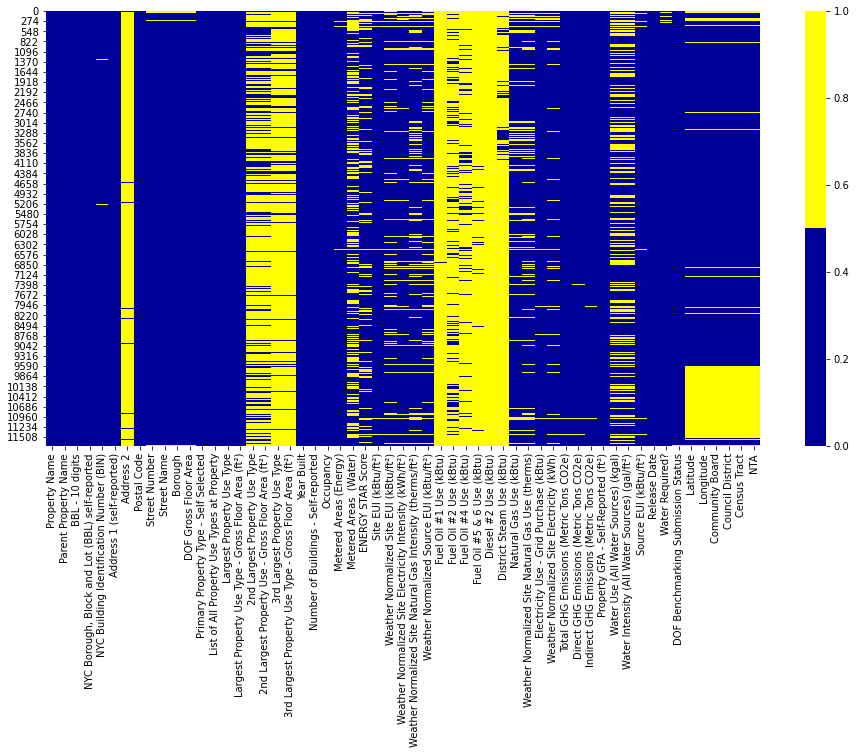

In [10]:
# желтый - пропущенные данные, синий - не пропущенные
plt.figure(figsize=(16,8))
colours = ['#000099', '#ffff00']
sns.heatmap(ds.isnull(), cmap=sns.color_palette(colours)).set_title('Карта пропущенных значений')

In [11]:
missed_ratio = (ds.isna().sum()/len(ds)*100).sort_values(ascending=False) 
missed_ratio # процент пропущенных значений в каждом признаке

Fuel Oil #1 Use (kBtu)                                        99.923378
Diesel #2 Use (kBtu)                                          99.863783
Address 2                                                     98.237698
Fuel Oil #5 & 6 Use (kBtu)                                    94.942959
District Steam Use (kBtu)                                     92.031330
Fuel Oil #4 Use (kBtu)                                        88.753618
3rd Largest Property Use Type - Gross Floor Area (ft²)        87.365912
3rd Largest Property Use Type                                 87.365912
Fuel Oil #2 Use (kBtu)                                        78.026562
2nd Largest Property Use - Gross Floor Area (ft²)             68.150860
2nd Largest Property Use Type                                 68.150860
Metered Areas  (Water)                                        39.238890
Water Intensity (All Water Sources) (gal/ft²)                 33.917930
Water Use (All Water Sources) (kgal)                          33

Выбросим признаки, в которых отсутствуют больше 60 процентов данных:

In [12]:
ds = ds.drop(missed_ratio[missed_ratio>60].index, axis=1)

Прежде чем выполнять препроцессинг данных разделим весь датасет на тренировочную и тестовую выборки. Все действия с данными будем выполнять отдельно на тренировочной и тестовой выборках. Это необходимо сделать, чтобы избежать так называемой "утечки данных" (data leakage) при обработке и подготовке датасета.

In [13]:
from sklearn.model_selection import train_test_split

Разделим выборку на тренировочную и тестовую. Установив параметр test_size от 0 до 1, можно указать размер тестовой выборки, также установим параметр shuffle=True, для перемещивания образцов.

In [14]:
ds_train, ds_test = train_test_split(ds, test_size=0.2, random_state=17, shuffle=True) # train - 80%, test - 20%

In [15]:
print(ds.shape)
print(ds_train.shape)
print(ds_test.shape)

(11746, 46)
(9396, 46)
(2350, 46)


Заполним пропуски в численных данных медианными значениями, а пропуски в категориальных данных - модальными:

In [16]:
num_columns = ds.select_dtypes(exclude='O').columns # численные признаки в датасете
cat_columns = ds.select_dtypes(include='O').columns # категориальные признаки в датасете

In [17]:
def fill_values(ds, num_columns, cat_columns):
    """Функция для заполнения пропусков"""
    ds[num_columns] = ds[num_columns].fillna(ds[num_columns].median()) # заполним пропуски медианными значениями
    ds[cat_columns] = ds[cat_columns].fillna(ds[cat_columns].mode(axis=0).iloc[0]) # заполним пропуски модальными значениями
    return ds

In [18]:
ds_train = fill_values(ds_train, num_columns, cat_columns)
ds_test = fill_values(ds_test, num_columns, cat_columns)

/usr/local/lib/python3.9/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.9/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [19]:
print('Кол-во пропущенных значения в тренировочном и тестовом сетах: {} и {}'.format(ds_train.isna().sum().sum(),
                                                                            ds_train.isna().sum().sum()))

Кол-во пропущенных значения в тренировочном и тестовом сетах: 0 и 0
